In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#import necessary packages

import pandas as pd


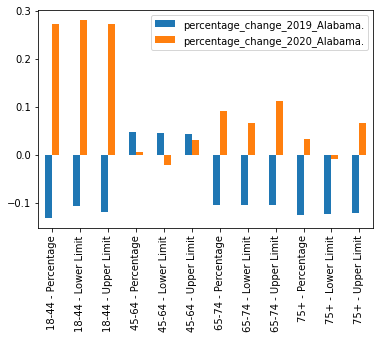

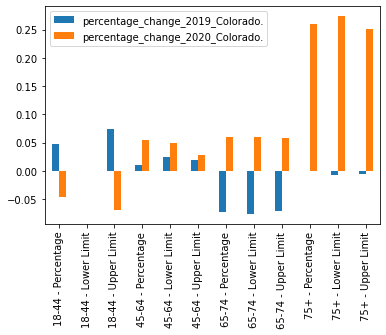

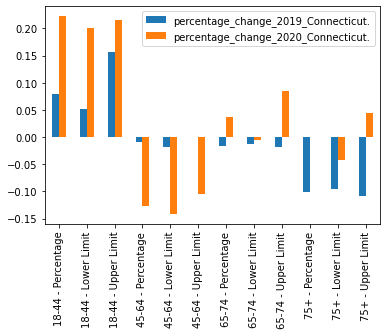

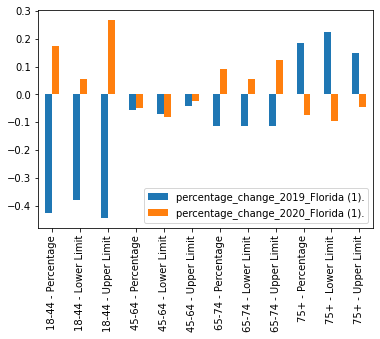

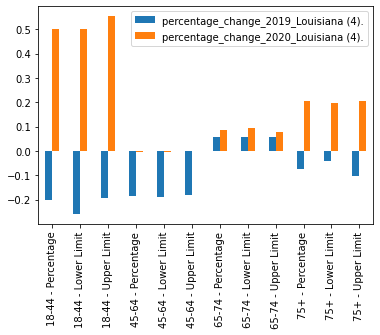

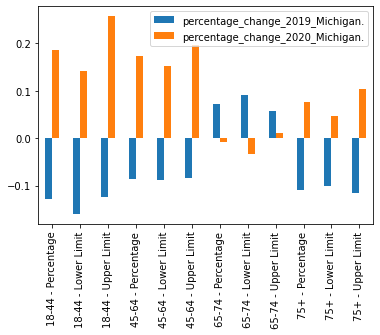

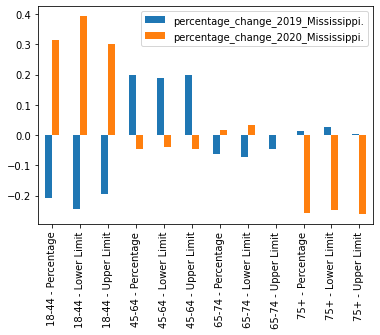

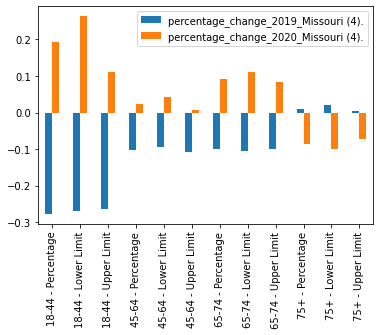

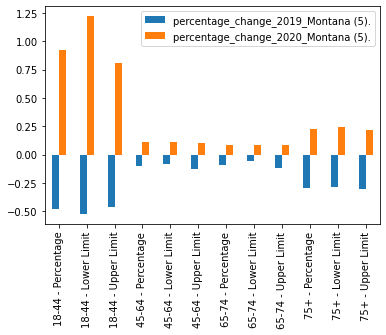

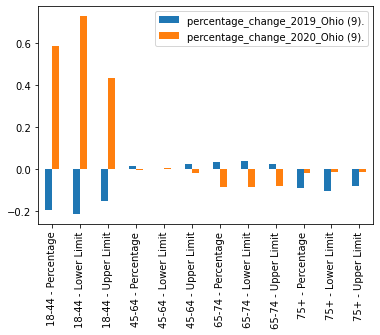

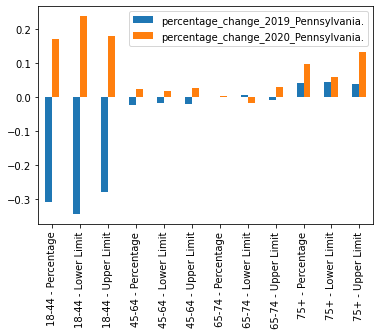

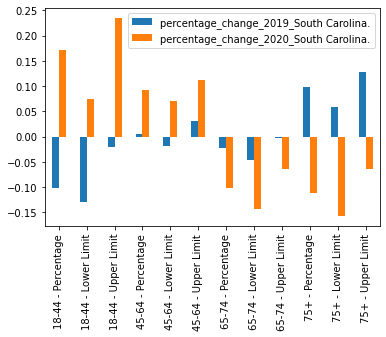

In [7]:
import pandas as pd
import glob
import re

path = r'/content/drive/MyDrive/Problem-1/datasets' # use your path to read all the csv file which is state wise
all_files = glob.glob(path + "/*.csv") # reading all the csv files

for filename in all_files:
    
    
    state = re.findall("\_.*\.", filename) # To extract the state name form csv files
    state=state[0]
    df = pd.read_csv(filename,on_bad_lines='skip') # reading the csv file and storing in a data frame
    df.dtypes # to check the data types
    df_filterd= df[df['Year'].isin([2018,2019,2020])] # keep the rows of year 2018, 2019,2020
    df_filterd.set_index('Year', inplace=True) # set the year column as index
    df_filterd_pct_change=df_filterd.pct_change() # percentage change with  previous year.
    df_filterd_pct_change.drop(index=df_filterd_pct_change.index[0], 
        axis=0, 
        inplace=True) # dropping the percentage of 2018 with previous year
    df_filterd_pct_change
    percentage_2019 = df_filterd_pct_change.iloc[0] #percentage of 2019 with 2018
    percentage_2020 = df_filterd_pct_change.iloc[1] #percentage of 2020 with 2019
    index = df_filterd_pct_change.columns
    df = pd.DataFrame({'percentage_change_2019'+state: percentage_2019, 'percentage_change_2020'+state: percentage_2020}, index=index) # data frame with the percentage change
    ax = df.plot.bar(rot=90)    # plotting the percentage change

    
    
    